# Worksheet 14

Name:  Jou-Hsuan Lee  
UID: U15459646  

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No) = 3/7
- P(Attribute B = Divorced | Class = Yes) = 1/3
- P(Attribute C = High | Class = No) = 3/7
- P(Attribute C = Mid | Class = Yes) = 1

b) Classify the following unseen records:

- (Yes, Married, Mid): Yes=0, No=6/245 => No
- (No, Divorced, High): Yes=0, No=6/245 => No
- (No, Single, High): Yes=0, No=12/245 => No
- (No, Divorced, Low): Yes=0, No=6/245 => No

### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

In [27]:
actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

def confusion_matrix(actual, predicted):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(actual_class)):
        if actual_class[i] == 'Yes' and predicted_class[i] == 'Yes':
            tp += 1
        elif actual_class[i] == 'No' and predicted_class[i] == 'Yes':
            fp += 1
        elif actual_class[i] == 'No' and predicted_class[i] == 'No':
            tn += 1
        elif actual_class[i] == 'Yes' and predicted_class[i] == 'No':
            fn += 1
    return [[tp, fn],[fp, tn]]

print(confusion_matrix(actual_class, predicted_class))

[[2, 1], [3, 4]]


b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

-2+5+30=33

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

In [28]:
import numpy as np

def cost(actual, predicted, cost_matrix):
    confuse = np.array(confusion_matrix(actual, predicted))
    a = np.multiply(np.array(confuse),np.array(cost_matrix))
    return np.sum(a)

cost_matrix = [[-1,5],[10,0]]
cost(actual_class, predicted_class, cost_matrix)

33

d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

In [29]:
def metrics(actual, predicted):
    confuse = confusion_matrix(actual_class, predicted_class)
    tp = confuse[0][0]
    tn = confuse[1][1]
    fp = confuse[1][0]
    fn = confuse[0][1]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f = 2*precision*recall/(precision+recall)
    return (accuracy, precision, recall, f)

print('accuracy:',metrics(actual_class, predicted_class)[0])
print('precision:',metrics(actual_class, predicted_class)[1])
print('recall:',metrics(actual_class, predicted_class)[2])
print('f-measure:',metrics(actual_class, predicted_class)[3])

accuracy: 0.6
precision: 0.4
recall: 0.6666666666666666
f-measure: 0.5


## Some useful code for the midterm

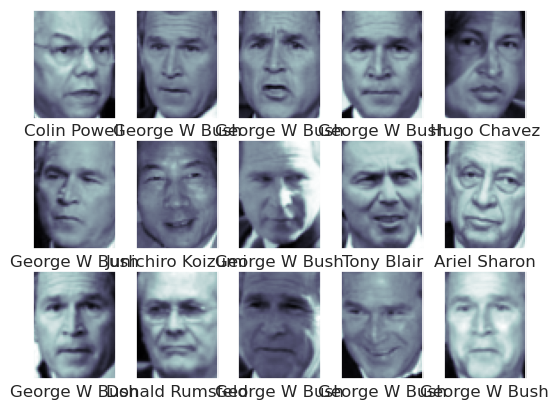

{'svc__C': 10, 'svc__gamma': 0.005}


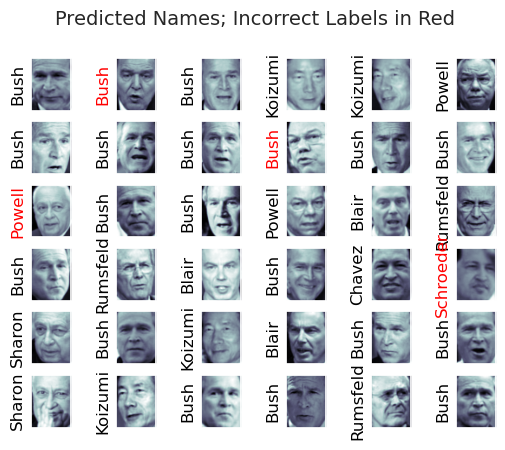

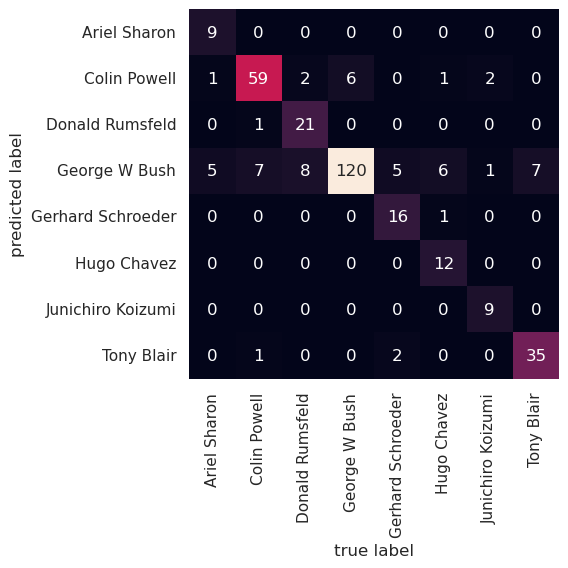

Accuracy =  0.8338278931750742


In [18]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
kfold = 10
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))